# Sea Surface quantities
This notebook calculates and plots SST and SSS over the final year of each experiment.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
#db='/g/data/ik11/outputs/mom6-panan/panant.db'
session=cc.database.create_session()
expts = ['panant-01-hycom1','panant-01-hycom1-v6']

In [16]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37139,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.135:41619,Total threads: 4
Dashboard: /proxy/44821/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:45433,


#  maps

These are currently calculated over the final year of each experiment.

In [3]:
depth = cc.querying.getvar('panant-01-hycom1','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [5]:
SST = cc.querying.getvar('panant-01-hycom1-v6','thetao', session)

In [6]:
SST

,Array,Chunk
Bytes,101.99 GiB,2.61 MiB
Shape,"(120, 75, 845, 3600)","(1, 11, 121, 515)"
Count,82360 Tasks,41160 Chunks
Type,float32,numpy.ndarray


Text(0.5, 1.0, 'diff')

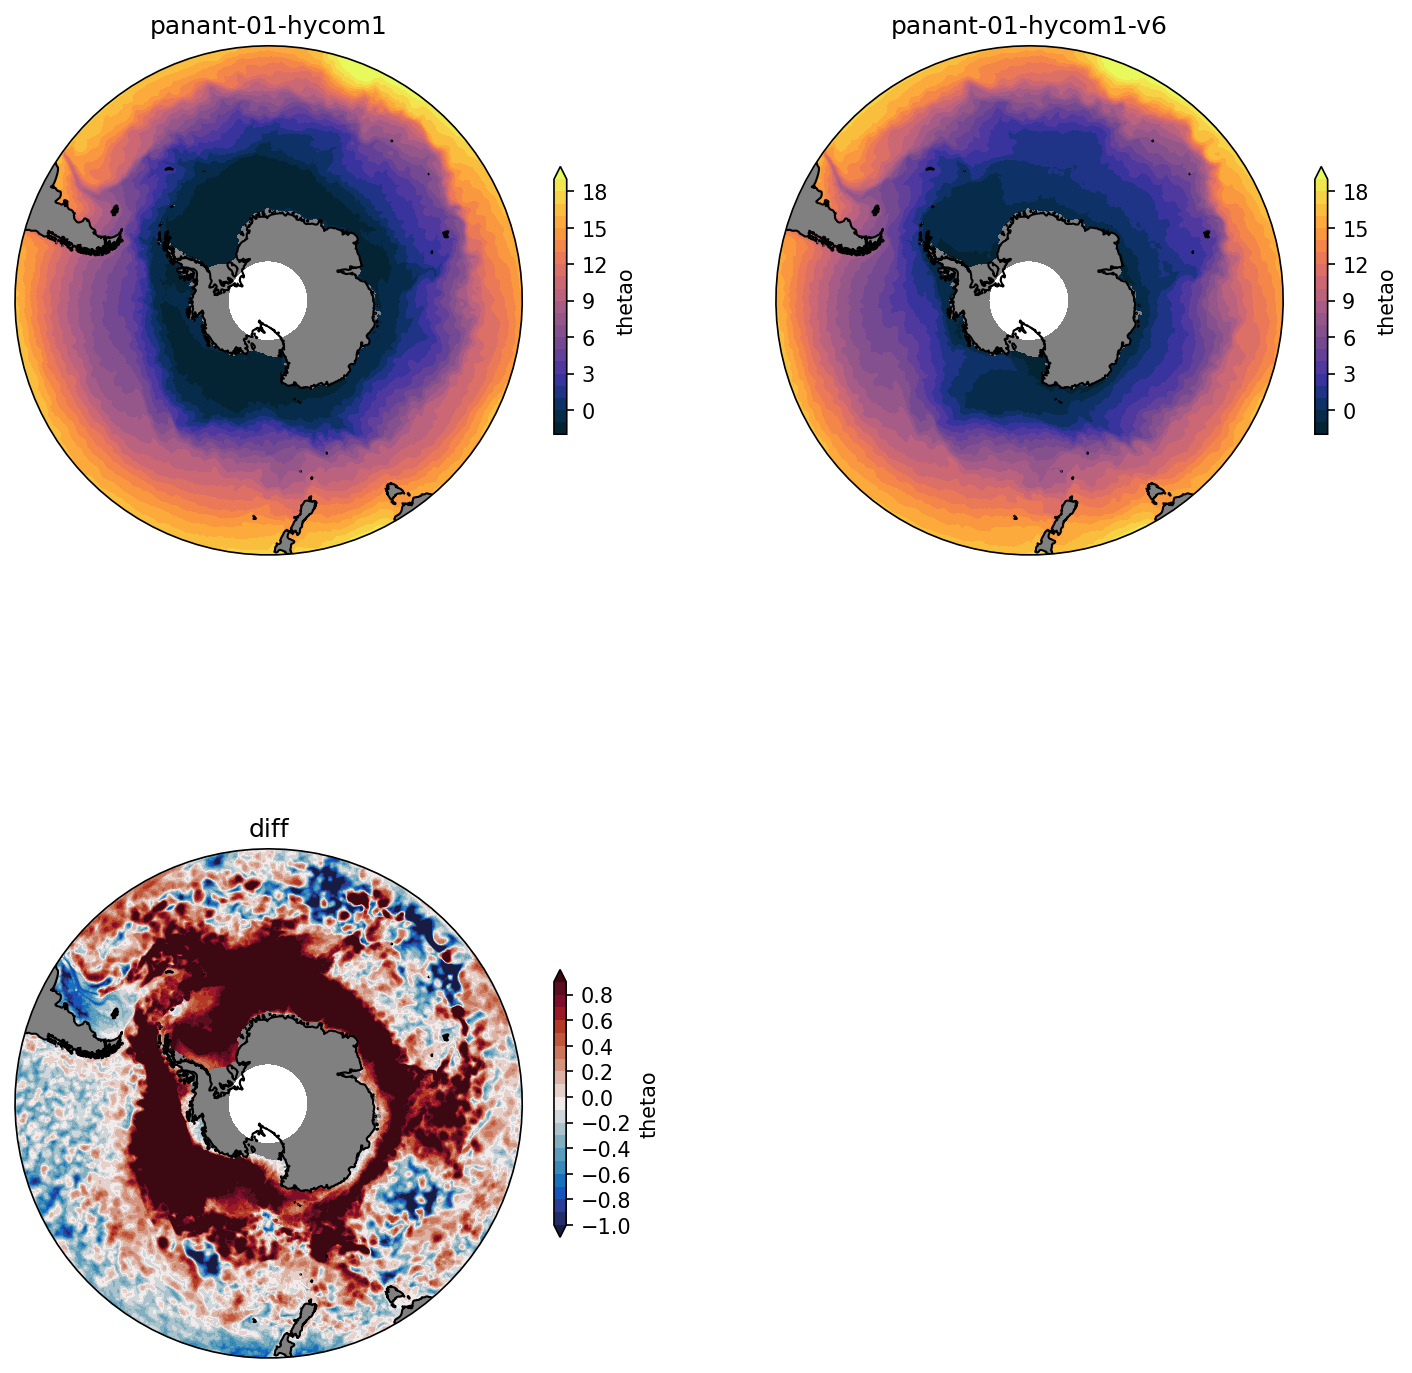

In [13]:
projection=ccrs.SouthPolarStereo()
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

fig = plt.figure(figsize=(12, 13), dpi=150)
ii=0
SSTref = cc.querying.getvar('panant-01-hycom1','thetao', session).isel(z_l=0).isel(time=slice(-12,-1)).mean('time').load()
SSTv6 = cc.querying.getvar('panant-01-hycom1-v6','thetao', session).isel(z_l=0).isel(time=slice(-12,-1)).mean('time').load()
SSTdiff = SSTv6-SSTref

ax = plt.subplot(2,2,1, projection=projection)
SSTref.plot.contourf(ax=ax,levels=np.arange(-2,20,1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.thermal,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1')

ax = plt.subplot(2,2,2, projection=projection)
SSTv6.plot.contourf(ax=ax,levels=np.arange(-2,20,1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.thermal,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1-v6')

ax = plt.subplot(2,2,3, projection=projection)
SSTdiff.plot.contourf(ax=ax,levels=np.arange(-1,1,0.1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.balance,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('diff')

Text(0.5, 1.0, 'diff')

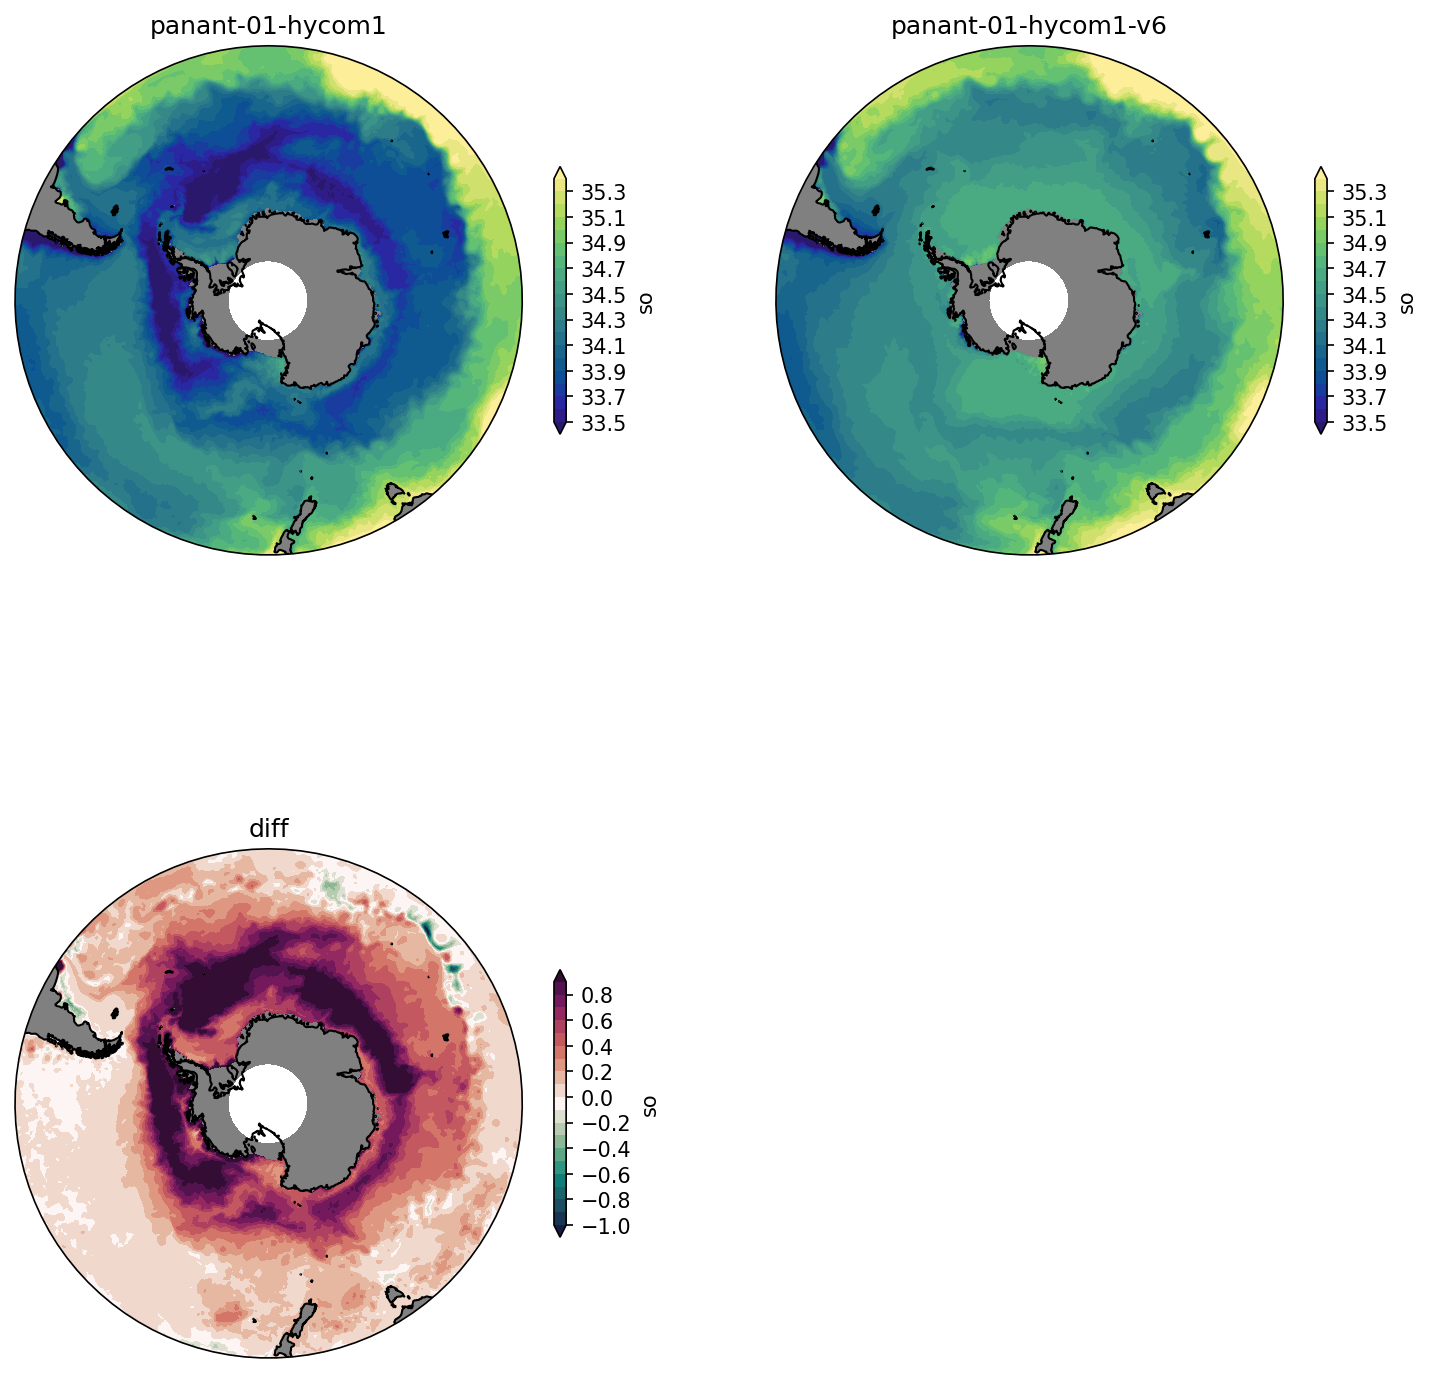

In [14]:
fig = plt.figure(figsize=(12, 13), dpi=150)
ii=0
SSSref = cc.querying.getvar('panant-01-hycom1','so', session).isel(z_l=0).isel(time=slice(-12,-1)).mean('time').load()
SSSv6 = cc.querying.getvar('panant-01-hycom1-v6','so', session).isel(z_l=0).isel(time=slice(-12,-1)).mean('time').load()
SSSdiff = SSSv6-SSSref

ax = plt.subplot(2,2,1, projection=projection)
SSSref.plot.contourf(ax=ax,levels=np.arange(33.5,35.5,0.1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.haline,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1')

ax = plt.subplot(2,2,2, projection=projection)
SSSv6.plot.contourf(ax=ax,levels=np.arange(33.5,35.5,0.1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.haline,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1-v6')

ax = plt.subplot(2,2,3, projection=projection)
SSSdiff.plot.contourf(ax=ax,levels=np.arange(-1,1,0.1),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.curl,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('diff')

Text(0.5, 1.0, 'diff')

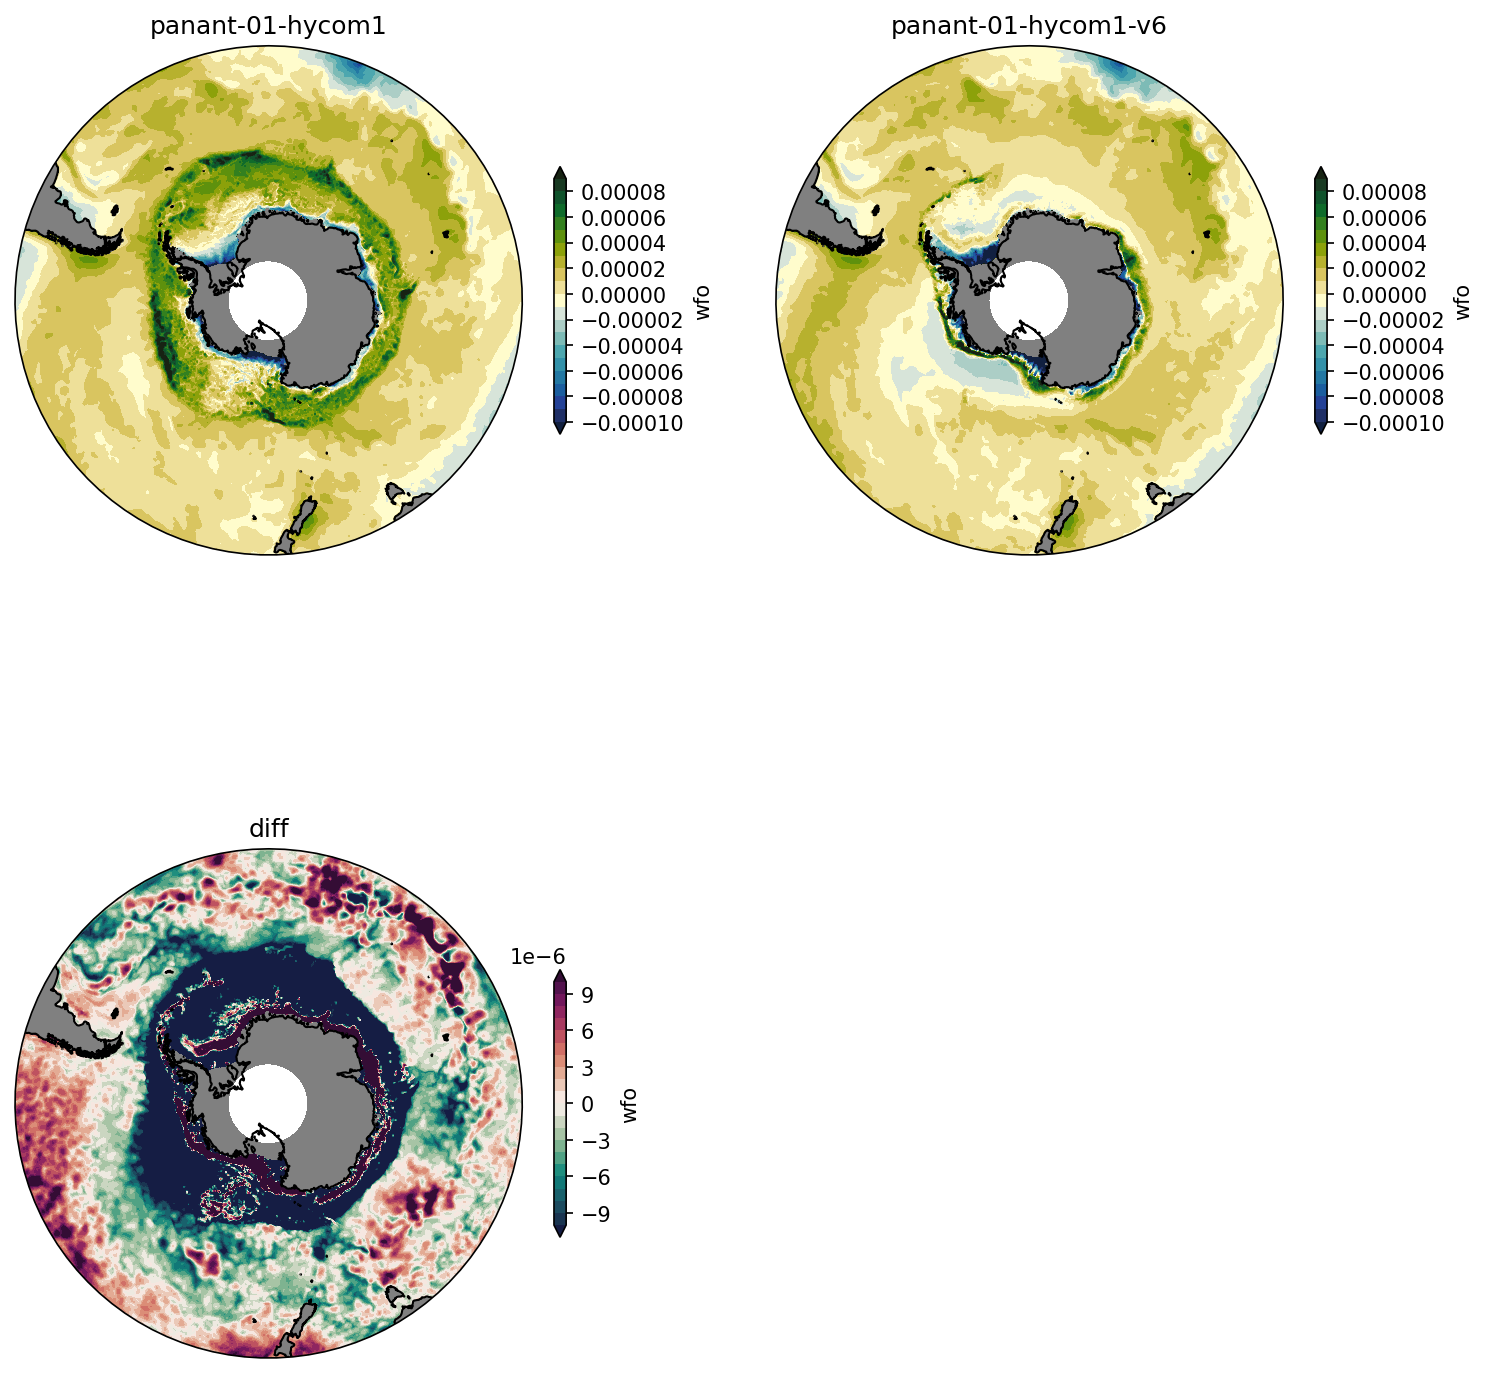

In [22]:
fig = plt.figure(figsize=(12, 13), dpi=150)
ii=0
WFOref = cc.querying.getvar('panant-01-hycom1','wfo', session).isel(time=slice(-12,-1)).mean('time').load()
WFOv6 = cc.querying.getvar('panant-01-hycom1-v6','wfo', session).isel(time=slice(-12,-1)).mean('time').load()
WFOdiff = WFOv6-WFOref

ax = plt.subplot(2,2,1, projection=projection)
WFOref.plot.contourf(ax=ax,levels=np.arange(-1e-4,1e-4,1e-5),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1')

ax = plt.subplot(2,2,2, projection=projection)
WFOv6.plot.contourf(ax=ax,levels=np.arange(-1e-4,1e-4,1e-5),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.delta,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('panant-01-hycom1-v6')

ax = plt.subplot(2,2,3, projection=projection)
WFOdiff.plot.contourf(ax=ax,levels=np.arange(-1e-5,1e-5,1e-6),transform=ccrs.PlateCarree(),
                      cmap=cm.cm.curl,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
plt.title('diff')